### Code to plot the most recent color telemetry profile
#### 12/28/2019 CJH

In [1]:
import sys
import time
from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ip = '172.22.11.2'
ip = 'roboRIO-2429-FRC.local'
NetworkTables.initialize(server=ip)

False

In [3]:
def valueChanged(table, key, value, isNew):
    print("valueChanged: key: '%s'; value: %s; isNew: %s" % (key, value, isNew))
def connectionListener(connected, info):
    print(info, "; Connected=%s" % connected)

In [4]:
NetworkTables.addConnectionListener(connectionListener, immediateNotify=True)

In [5]:
sd = NetworkTables.getTable("SmartDashboard")

In [11]:
def get_data():
    # this was a lot simpler but stupid network tables can only take 256 values per array
    data_time = np.array(sd.getNumberArray('color_telemetry_time',0))
    data_color = np.array(sd.getStringArray('color_telemetry_color',0))
    data = np.column_stack((data_time,data_color))
    df = pd.DataFrame(data, columns =['time','color'])
    return df

In [16]:
get_data()

,time,color
0,0.006774000000000058,No Match
1,0.022455999999998255,No Match
2,0.041650999999998106,No Match
3,0.061874999999997016,No Match
4,0.08184999999999931,No Match
...,...,...
250,5.001657999999999,No Match
251,5.021642,No Match
252,5.041736999999998,No Match
253,5.061774,No Match


In [7]:
def plot_df(df):
# multiple line plot
    save = False
    markersize = 3
    linewidth = 1.2
    colors=['blue', 'orange', 'green', 'red']
    label = "Mapping Smart Motion Profile on SparkMax"
    plt.figure(num=None, figsize=(10,6),dpi=100)
    for i in range(3):
        plt.plot( 'time', df.columns[i+1], data=df, marker='o', markerfacecolor=colors[i], markersize=markersize, color=colors[i], linewidth=1)
    #plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.ylim(-1.1,1.1)
    plt.title(label)
    plt.xlabel('time (s)')
    plt.ylabel('inches, rpm/10, amps')
    if save:
        plt.ioff()
        plt.savefig(fname)
        plt.close()
    plt.show()

In [13]:
def plot_df2(df):
    # Make two dual-axis plots with the relevant information
    save = False
    markersize = 4
    linewidth = 1.2
    colors=['orange', 'blue', 'green', 'red','orange']
    label = "Mapping Color Profile from Robot"

    fig, ax1 = plt.subplots(figsize=(8,8),dpi=100)
    ax1=plt.subplot(211)
    index = 1
    #ax1.set_xlabel('time (s)')
    ax1.set_ylabel(df.columns[index], color=colors[index])
    ax1.plot('time', df.columns[index], data=df, color=colors[index], marker='o', markersize=markersize)
    ax1.tick_params(axis='y', labelcolor=colors[index])
    index = 2
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel(df.columns[index], color=colors[index])  # we already handled the x-label with ax1
    ax2.plot('time', df.columns[index], data=df, color=colors[index], marker='o', markersize=markersize)
    ax2.tick_params(axis='y', labelcolor=colors[index])
    plt.title(label)
    
    ax3=plt.subplot(212)
    index = 3
    ax3.set_xlabel('time (s)')
    ax3.set_ylabel(df.columns[index], color=colors[index])
    ax3.plot('time', df.columns[index], data=df, color=colors[index], marker='o', markersize=markersize)
    ax3.tick_params(axis='y', labelcolor=colors[index])
    index = 4
    ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
    ax4.set_ylabel(df.columns[index], color=colors[index])  # we already handled the x-label with ax1
    ax4.plot('time', df.columns[index], data=df, color=colors[index], marker='o', markersize=markersize)
    ax4.tick_params(axis='y', labelcolor=colors[index])
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.ioff()
        plt.savefig(fname)
        plt.close()
    plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

read error: [WinError 10051] A socket operation was attempted to an unreachable network


ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=153653.531, protocol_version=768) ; Connected=False


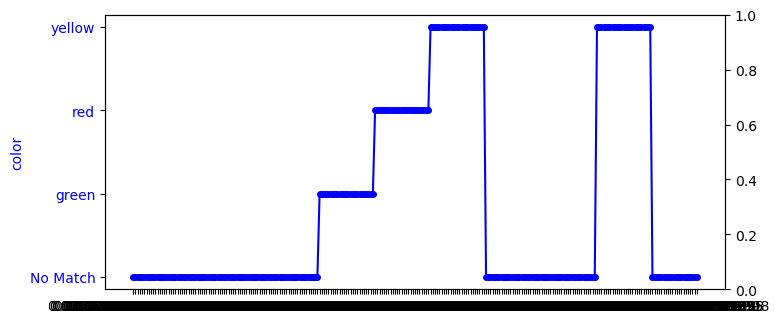

ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


Received an invalid UTF-8 string: b'\xd0\xcf\xa7\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xa8\n\xa7\x00nomousRoutes'
Received an invalid UTF-8 string: b' ,\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xc0\n\xa7\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xb01\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xe8\xcf\xa7\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x00K\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x18K\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xc0s\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xa8s\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xa8\xa3\xa7\x00nomousRoutes'
Received an invalid UTF-8 string: b'@;\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'h\x1f\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xb8i\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x10L\xa8\x00nomousRoutes'
Received an invalid UTF-8 string: b'P\x8a\xa8\x00n

ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=155124.656, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


read error: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond


ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=155349.75, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


read error: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond


ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=155856.015, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=156041.453, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


Received an invalid UTF-8 string: b' \xabn\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xc0\xe5n\x01nomousRoutes'
Received an invalid UTF-8 string: b'(\xe0l\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x90\x0co\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x98\x9bm\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xb8\xf8l\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x08\xcdm\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x00\xf0n\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xa0\xf8l\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xf0\xccm\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xa0\xf6l\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xa8\x9bm\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xb8\xf6l\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x00\xf0n\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xa8\x9bm\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xb8\xf6l\x01nomousRoutes

ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=156435.796, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=156545.953, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=156739.593, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


read error: [WinError 10051] A socket operation was attempted to an unreachable network


ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=157003.046, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


Received an invalid UTF-8 string: b'\xe0S\xd2\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x98\xac\xd0\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x98\xbd\xce\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x10\x01\xdd\x01nomousRoutes'
Received an invalid UTF-8 string: b'h\xe7\xdc\x01nomousRoutes'
Received an invalid UTF-8 string: b'P\xde\xdc\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xb8\x05\xdd\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xb0\x14\xdd\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x80\xe7\xdc\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x08\xde\xca\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xd0\x1b\xdd\x01nomousRoutes'
Received an invalid UTF-8 string: b'h%\xdd\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xb8\x1b\xdd\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xb0\t\xdd\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xa8r\xcf\x01nomousRoutes'
Received an invalid UTF-8 stri

ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=157880.328, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


Received an invalid UTF-8 string: b'\x801n\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x98\xc8p\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x18\xc9p\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xf8\xa8p\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x98\xc8p\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x801n\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xf8\xa8p\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x18\xc9p\x00nomousRoutes'
Received an invalid UTF-8 string: b'0\xc9p\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x98\xc8p\x00nomousRoutes'
Received an invalid UTF-8 string: b'(\xf8n\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xf8\xa8p\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xd0\x03p\x00nomousRoutes'
Received an invalid UTF-8 string: b'(\xf8n\x00nomousRoutes'
Received an invalid UTF-8 string: b'\xf8\xa8p\x00nomousRoutes'
Received an invalid UTF-8 string: b'\x98\xc8p\x00nomousRoutes'
Receive

ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=158885.609, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


Received an invalid UTF-8 string: b'\xf8\xbe\xfe\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x90+\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'xm\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xc0+\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'(o\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'xm\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'(F\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x90+\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xf8\xbe\xfe\x01nomousRoutes'
Received an invalid UTF-8 string: b'xm\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xf08\xe6\x01nomousRoutes'
Received an invalid UTF-8 string: b'xm\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'\x90+\xff\x01nomousRoutes'
Received an invalid UTF-8 string: b'0\xc2\xfd\x01nomousRoutes'
Received an invalid UTF-8 string: b'\xf08\xe6\x01nomousRoutes'
Received an invalid UTF-8 string: b'xm\xff\x01nomousRoutes'
Receive

In [17]:
df=get_data()
plot_df2(df)

In [15]:
df.plot()

TypeError: no numeric data to plot

read error: [WinError 10051] A socket operation was attempted to an unreachable network


ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=153310.89, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=153588.687, protocol_version=768) ; Connected=False
ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


In [11]:
df.diff().describe()

,time,position,velocity,current,output
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True
